# WTTA - Assignment #1 

## Inputs and Data Loading 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bem import steady_bem


# Inputs
R = 89.17       # Radius of rotor [m]
V_0 = 10.0      # Wind speed [m/s]
omega = 8.032   # Angular velocity of rotor [RPM]

# Read txt with blade data
df = pd.read_csv('data/bladedat.txt', sep='\t', names=['r', 'beta', 'c', 'thick'])

# RPM to rad/s
omega = omega*2*np.pi/60

# Question 1

In [10]:
number_of_theta_p = 20
number_of_lamda = 20

counter = 0
theta_p_list = np.linspace(-3, 4, number_of_theta_p)
lamda_list = np.linspace(5, 10, number_of_lamda)

# Initiliaze 2D matrices
P_out_matrix = np.zeros((number_of_theta_p, number_of_lamda))
Thrust_matrix = np.zeros((number_of_theta_p, number_of_lamda))
C_P_matrix = np.zeros((number_of_theta_p, number_of_lamda))
C_T_matrix = np.zeros((number_of_theta_p, number_of_lamda))

for i, theta_p in enumerate(theta_p_list):
    for j, lamda in enumerate(lamda_list):
        omega = lamda*V_0/R
        P_out, Thrust, C_P, C_T = steady_bem(R, V_0, omega, theta_p, lamda, df, model='Glauret', error=1e-6)
        P_out_matrix[i, j] = P_out
        Thrust_matrix[i, j] = Thrust
        C_P_matrix[i, j] = C_P
        C_T_matrix[i, j] = C_T

aoa = 69.57720353735972
C_l = 0.0
C_d = 0.6
aoa = 45.51189749077302
C_l = 0.35741721248746894
C_d = 0.6304697821677198
aoa = 33.86894976736626
C_l = 0.9434151927825302
C_d = 0.4514960316851667
aoa = 28.43278094269978
C_l = 1.1008825527860515
C_d = 0.42333248203849333
aoa = 21.92642931761392
C_l = 1.2176834297786874
C_d = 0.21194921754226317
aoa = 17.094453101009506
C_l = 1.6090171121997203
C_d = 0.06956910648842551
aoa = 15.229601343852368
C_l = 1.7787125128751806
C_d = 0.03409445232128861
aoa = 14.96304880214095
C_l = 1.8078775981769333
C_d = 0.02920363720919509
aoa = 15.05666034132172
C_l = 1.812184170524561
C_d = 0.029364522105044408
aoa = 15.12532089452128
C_l = 1.8123255776101383
C_d = 0.029802053724936196
aoa = 15.103694934319012
C_l = 1.812286608350201
C_d = 0.029663652115349368
aoa = 15.07212325509494
C_l = 1.8122298060857642
C_d = 0.029461590512218694
aoa = 15.027251290494236
C_l = 1.8121490523228896
C_d = 0.029174408259163113
aoa = 14.897329534510963
C_l = 1.8119151931621198


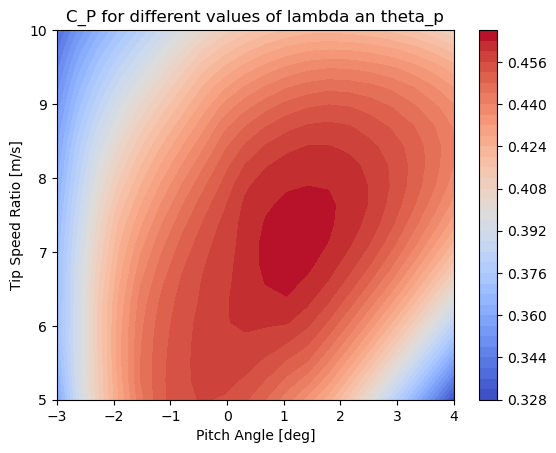

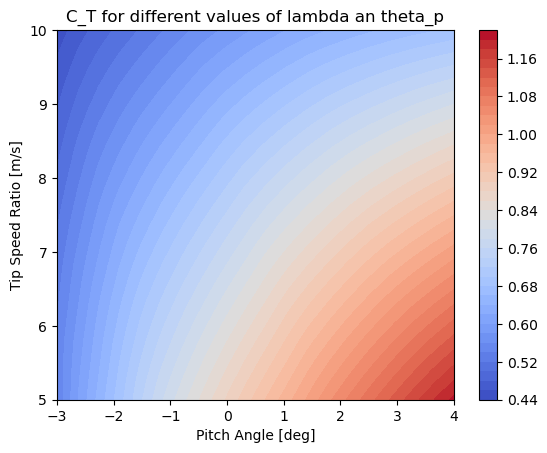

In [11]:
X, Y = np.meshgrid(theta_p_list, lamda_list)

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, C_P_matrix, 40, cmap='coolwarm')  # Should we add vmin=0.3, vmax=0.5 ??
fig.colorbar(cp)
ax.set_title('C_P for different values of lambda an theta_p')
ax.set_xlabel('Pitch Angle [deg]')
ax.set_ylabel('Tip Speed Ratio [m/s]')
plt.show()


fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, C_T_matrix, 40, cmap='coolwarm')  # Should we add vmin=0.3, vmax=0.5 ??
fig.colorbar(cp)
ax.set_title('C_T for different values of lambda an theta_p')
ax.set_xlabel('Pitch Angle [deg]')
ax.set_ylabel('Tip Speed Ratio [m/s]')
plt.show()

In [12]:
def find_maxes_of_matrix(matrix, row_list, column_list):
    max_value = np.max(matrix)
    i, j = np.unravel_index(matrix.argmax(), matrix.shape)
    row = row_list[j]
    column = column_list[i]
    return max_value, row, column

C_P_max, theta_p_for_C_P_max, lamda_for_C_P_max = find_maxes_of_matrix(C_P_matrix, theta_p_list, lamda_list)

print(f'Using {number_of_theta_p} theta_ps and {number_of_lamda} lamdas, ' + \
    f'C_P_max = {C_P_max:.3f} for theta_p = {theta_p_for_C_P_max:.3f} and lamda = {lamda_for_C_P_max:.3f}')

Using 20 theta_ps and 20 lamdas, C_P_max = 0.466 for theta_p = 1.053 and lamda = 7.105


# Question 2

In [6]:
import numpy as np
import pandas as pd
from bem import steady_bem_for_each_airfoil


# Get dict for airfoil at r = 71.97 m 
df = pd.read_csv('data/bladedat.txt', sep='\t', names=['r', 'beta', 'c', 'thick'])
airfoil = df[df['r'].between(71, 73)].to_dict('records')[0]

# From Q1, C_P_max appears for theta_p = 1.128 and lamda = 7.179
theta_p_for_C_P_max = 1.128
lamda_for_C_P_max = 7.179

_, _, C_P_local, _, = steady_bem_for_each_airfoil(R, V_0, omega, theta_p_for_C_P_max, lamda_for_C_P_max, airfoil)
C_P_local

aoa = 6.56290605011721
C_l = 1.129152093058233
C_d = 0.011322179537587906


0.4960492260672027

In [3]:
from bem import steady_bem_for_each_airfoil_q2

number_of_c = 100


counter = 0
c_list = np.linspace(0, 5, number_of_c)

# Initiliaze 2D matrices
C_P_local_arr = np.zeros(number_of_c)
beta_list = np.zeros(number_of_c)


for i, c in enumerate(c_list):
    airfoil['c'] = c
    p_n, p_t, C_P_local, C_T_local, beta = steady_bem_for_each_airfoil_q2(R, V_0, omega, theta_p_for_C_P_max, lamda_for_C_P_max, airfoil)
    C_P_local_arr[i] = C_P_local
    beta_list[i] = beta

ind = np.argmax(C_P_local_arr)
print(f'C_P_local_arr = {C_P_local_arr[ind]}')
print(f'beta = {beta_list[ind]}')
print(f'c_list = {c_list[ind]}')


beta = 1.689661089903682 at c = 0.0
beta = 1.6537688417476861 at c = 0.050505050505050504
beta = 1.6176491814408944 at c = 0.10101010101010101
beta = 1.581289790478337 at c = 0.15151515151515152
beta = 1.5446934239129924 at c = 0.20202020202020202
beta = 1.5078519465368636 at c = 0.25252525252525254
beta = 1.4707598171234597 at c = 0.30303030303030304
beta = 1.4334113150345154 at c = 0.35353535353535354
beta = 1.3958005329460637 at c = 0.40404040404040403
beta = 1.3579213692204757 at c = 0.45454545454545453
beta = 1.3197548981133274 at c = 0.5050505050505051
beta = 1.2813135598804077 at c = 0.5555555555555556
beta = 1.24258207376805 at c = 0.6060606060606061
beta = 1.2035529525423385 at c = 0.6565656565656566
beta = 1.1642183918028923 at c = 0.7070707070707071
beta = 1.1245702521427035 at c = 0.7575757575757576
beta = 1.0846000400808116 at c = 0.8080808080808081
beta = 1.0442988876683987 at c = 0.8585858585858586
beta = 1.0036472695941665 at c = 0.9090909090909091
beta = 0.962652357140

# Original 
C_P_local = 0.4960492260672027

# Values to maximize the local Cp
C_P_local= 0.5024787992743521

beta = -1.716361934958777

c = 3.282828282828283

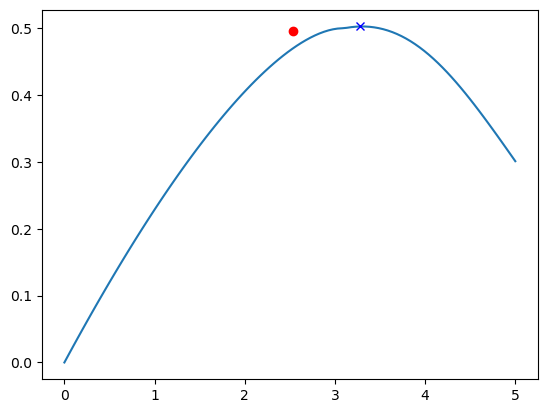

In [7]:
plt.plot(c_list, C_P_local_arr)
plt.plot(2.54, 0.4960492260672027, 'ro')
plt.plot(3.282828282828283, 0.5024787992743521, 'bx')

# Q3

In [20]:
P_mech = 10.64 * 1e6
A = np.pi*R**2
RHO = 1.225     # Air density [kg/m^3]

V_0_rated = (2*P_mech/(RHO*A*C_P_max))**(1/3)
omega_max = V_0_rated*lamda_for_C_P_max/R
print(V_0_rated)
print(omega_max, 'rad/s') 
print(omega_max*60/(2*np.pi), 'RPM') 

11.42636427508689
0.9104780207744698 rad/s
8.694424654966936 RPM


Text(0, 0.5, 'omega')

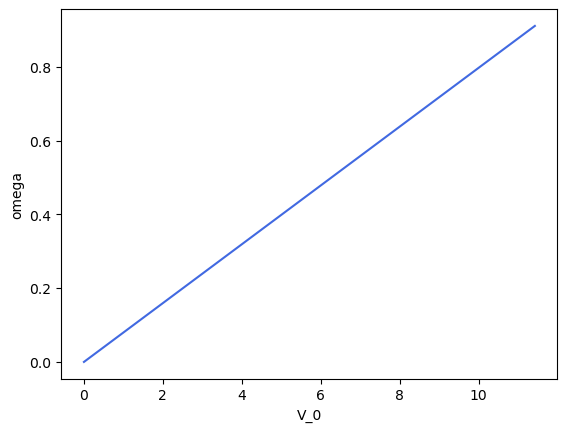

In [24]:
V_0_arr= np.linspace(0,V_0_rated,100)
omega_arr = lamda_for_C_P_max*V_0_arr/R
plt.plot(V_0_arr, omega_arr, color = 'royalblue')
plt.xlabel('V_0')
plt.ylabel('omega')

# It might have to start at V_0=cut_in_speed, V_0=cut_out_speed

# Q4

In [44]:
number_of_theta_p = 50
number_of_V_0 = 50

counter = 0
theta_p_list = np.linspace(-1, 30, number_of_theta_p)
V_0_list = np.linspace(4, 25, number_of_V_0) # Cut-in and cut-out wind speed

theta_rated = np.zeros(number_of_V_0)
P_out_rated = np.zeros(number_of_V_0)
Thrust_rated = np.zeros(number_of_V_0)
C_P_rated = np.zeros(number_of_V_0)
C_T_rated = np.zeros(number_of_V_0)

for i, V_0_q4 in enumerate(V_0_list):
    # If V_0 <= V_0_rated use theta_p_for_C_P_max, lamda_for_C_P_max
    if V_0_q4 <= V_0_rated:
        omega = V_0_q4*lamda_for_C_P_max/R
        P_out, Thrust, C_P, C_T = steady_bem(R, V_0_q4, omega, theta_p_for_C_P_max, lamda_for_C_P_max, df)
        P_out_rated[i] = P_out
        Thrust_rated[i] = Thrust
        C_P_rated[i] = C_P
        C_T_rated[i] = C_T
    else:
        # If V_0 > V_0_rated start pitching
        for j, theta_p in enumerate(theta_p_list):
            lamda = omega_max*R/V_0_q4
            P_out, Thrust, C_P, C_T = steady_bem(R, V_0_q4, omega_max, theta_p, lamda, df, model='Glauret', error=1e-6)
            if P_out >= 10.64 * 1e3:
                theta_rated[i] = theta_p
                P_out_rated[i] = P_out
                Thrust_rated[i] = Thrust
                C_P_rated[i] = C_P
                C_T_rated[i] = C_T
                continue

aoa = 61.87008650068414
C_l = 0.0
C_d = 0.6
aoa = 31.868717650212965
C_l = 0.3182765039150035
C_d = 0.5432316726336517
aoa = 20.781467050085794
C_l = 0.5486979515553264
C_d = 0.27096744399585415
aoa = 13.704884098103818
C_l = 1.1059543048902714
C_d = 0.14591854558993647
aoa = 7.14303331111761
C_l = 1.3215528037349835
C_d = 0.017788814942718306
aoa = 6.382031987249024
C_l = 1.1061480649039055
C_d = 0.012846522963848339
aoa = 6.111355106286627
C_l = 1.0773192997342584
C_d = 0.01152349014741899
aoa = 6.388876099198858
C_l = 1.1093896490207558
C_d = 0.011265235216605834
aoa = 6.81204817237549
C_l = 1.1572797683153464
C_d = 0.011509345426277393
aoa = 7.180815330392402
C_l = 1.1989140508013023
C_d = 0.011785611497794302
aoa = 7.435006708024006
C_l = 1.2276122562457707
C_d = 0.011976255772124831
aoa = 7.489242101819794
C_l = 1.2337354328871135
C_d = 0.012016931854768025
aoa = 7.527883887844789
C_l = 1.2380980909376769
C_d = 0.012045912915883592
aoa = 7.561219808268897
C_l = 1.2418617163535586

In [35]:
len(theta_rated)

50

Text(0, 0.5, 'theta_rated')

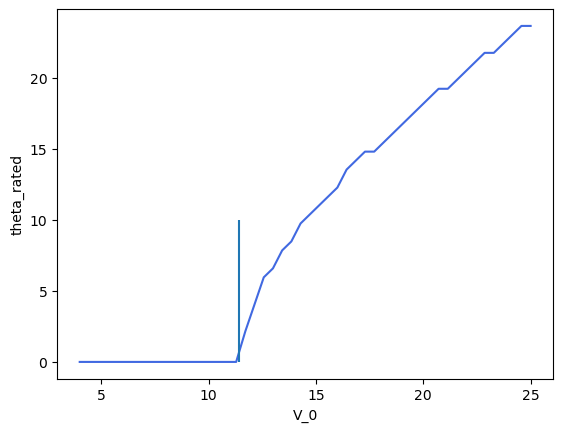

In [45]:
plt.plot(V_0_list, theta_rated, color = 'royalblue')
plt.xlabel('V_0')
plt.vlines(x=11.42636427508689, ymin=0, ymax=10)
plt.ylabel('theta_rated')

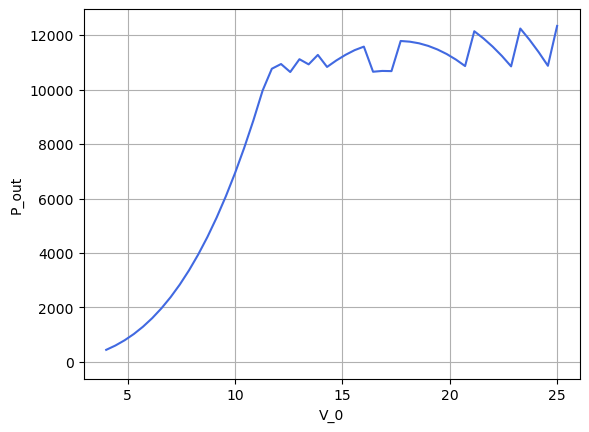

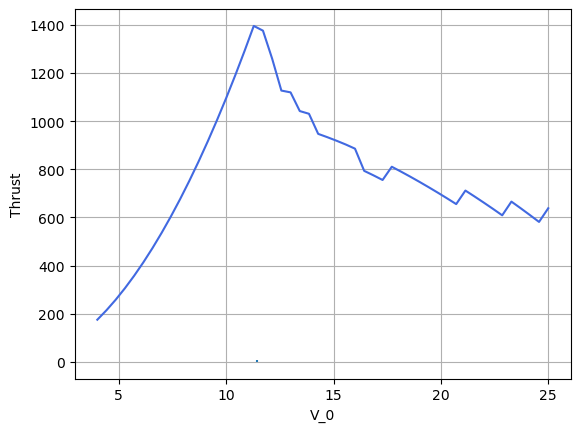

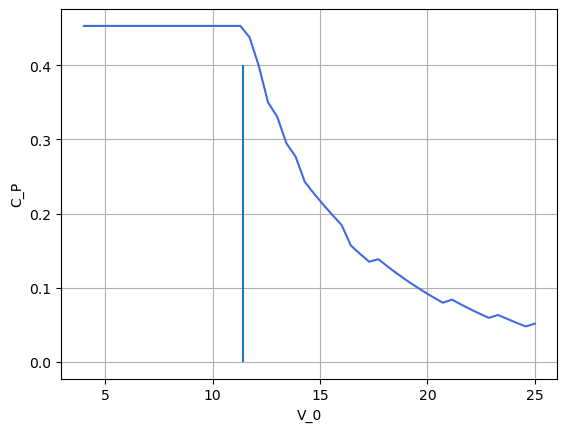

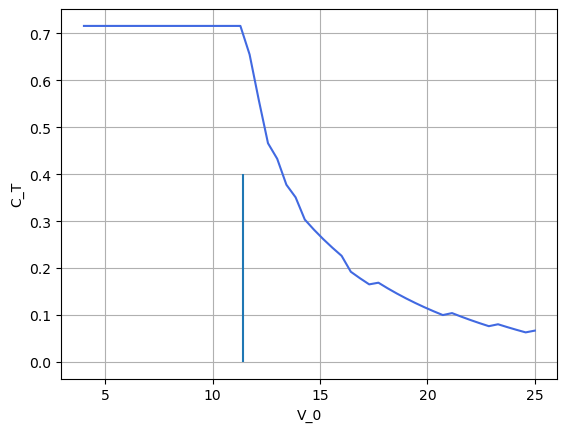

In [46]:
plt.plot(V_0_list, P_out_rated, color = 'royalblue')
plt.vlines(x=11.42636427508689, ymin=0, ymax=10)
plt.xlabel('V_0')
plt.ylabel('P_out')
plt.grid()
plt.show()

plt.plot(V_0_list, Thrust_rated, color = 'royalblue')
plt.vlines(x=11.42636427508689, ymin=0, ymax=10)
plt.xlabel('V_0')
plt.ylabel('Thrust')
plt.grid()

plt.show()

plt.plot(V_0_list, C_P_rated, color = 'royalblue')
plt.vlines(x=11.42636427508689, ymin=0, ymax=0.4)
plt.xlabel('V_0')
plt.ylabel('C_P')
plt.grid()
plt.show()

plt.plot(V_0_list, C_T_rated, color = 'royalblue')
plt.vlines(x=11.42636427508689, ymin=0, ymax=0.4)
plt.xlabel('V_0')
plt.ylabel('C_T')
plt.grid()
